In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
from sklearn import preprocessing

In [5]:
df=pd.read_csv("file:///C:/Users/Vasanth/Desktop/machine%20learning/ntrarogyaseva.csv")

In [6]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [8]:
df.head(10)

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03/08/2013 20:38:48,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06/08/2013 07:26:15,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09/08/2013 18:30:50,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D
5,6,35,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Phasigangupeta,Pathapatnam,Srikakulam,28/08/2013 17:30:32,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,P
6,7,52,Male,OC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kranti Nagar,Nandyal,Kurnool,30/08/2013 07:53:00,12500,22/03/2017 20:25:18,11000,Govt General Hospital Kurnool,G,KURNOOL,Kurnool,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D
7,8,73,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Bhoghapuram,Bhoghapuram,Vizianagaram,02/05/2014 15:11:45,12500,11/10/2017 19:34:53,5000,Queens Nri Hospitals,C,Visakhapatnam,Vishakhapatnam,05/05/2014 00:00:00,NaN,YES,23/05/2014 00:00:00,D
8,9,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,Guntur,10/06/2014 17:02:06,40000,17/02/2017 19:21:35,40000,Karumuri Hospital,C,GUNTUR,Guntur,14/06/2014 00:00:00,16/06/2014 00:00:00,NO,NaN,D
9,10,49,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.1.1,Coronary Bypass Surgery,Ward-15,Guntur(C),Guntur,11/06/2014 20:41:16,115846,17/02/2017 19:21:11,115846,Karumuri Hospital,C,GUNTUR,Guntur,17/06/2014 00:00:00,25/06/2014 00:00:00,NO,NaN,D


In [55]:
df.shape

(479688, 24)

In [56]:
df.isnull().sum()

                         0
AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64

In [57]:
df['HOSP_LOCATION'].unique()

array(['SRIKAKULAM', 'KURNOOL', 'Visakhapatnam', 'GUNTUR', 'HYDERABAD',
       'CHEERALA', 'KAKINADA', 'NELLORE', 'VISAKHAPATNAM', 'VIJAYAWADA',
       'KADAPA', 'Chittoor', 'TIRUPATHI', 'VIZIANAGARAM', 'ONGOLE',
       'ANANTAPUR', 'Kurnool', 'CHITTOOR', 'BHIMAVARAM', 'YSR',
       'Hyderabad', 'Ongole', 'RAJAHMUNDRY', 'Guntur', 'TANUKU', 'ELURU',
       'NARSARAOPET', 'RANGAREDDY', 'MACHILIPATNAM', 'SECUNDERABAD',
       'KHAMMAM', 'ANAKAPALLI', 'WEST GODAVARI', 'Vizianagaram',
       'PALAKOLLU', 'KUPPAM', 'EAST GODAVARI', 'TENALI',
       'RAMACHANDRAPURAM', 'NANDYALA', 'KADIRI', 'Tirupathi',
       'AMALAPURAM', 'WARANGAL', 'MADANAPALLI', 'MEHEDIPATNAM',
       'TADEPALLI GUDEM', 'Tadepalli Gudem', 'PRAKASHAM', 'BHADRACHALAM',
       'Kakinada', 'KARIMNAGAR', 'NIZAMABAD', 'GUDIVADA', 'MANDAPETA',
       'Rajahmundry', 'MAHBUBNAGAR', 'JANGAREDDY GUDEM', 'KAMAREDDY',
       'Ongole ', 'Vijayawada'], dtype=object)

In [58]:
df['CATEGORY_NAME'].unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
       'INFECTIOUS DISEASES'], dtype=object)

In [59]:
df['HOSP_TYPE'].unique()

array(['G', 'C'], dtype=object)

In [9]:
df['CLAIM_DATE'].unique()

array(['22/03/2017 20:25:18', '22/03/2017 20:25:19',
       '11/10/2017 19:34:53', ..., '30/12/2017 21:37:27',
       '30/12/2017 21:37:29', '30/12/2017 21:37:24'], dtype=object)

In [60]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION


In [62]:
##Fetaure Engineering Process
df['surgery_Day']=df['SURGERY_DATE'].str.split('/').str[0]
df['surgery_Month']=df['SURGERY_DATE'].str.split('/').str[1]
df['surgery_Year']=df['SURGERY_DATE'].str.split('/').str[2]

In [63]:
col=['MORTALITY_DATE','SURGERY_DATE']
df.drop(col,axis=1,inplace=True)

In [64]:
df.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,surgery_Day,surgery_Month,surgery_Year
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03/08/2013 20:38:48,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,07/09/2013 00:00:00,NO,D,06,08,2013 00:00:00
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06/08/2013 07:26:15,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,09/09/2013 00:00:00,NO,D,08,08,2013 00:00:00
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09/08/2013 18:30:50,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,18/10/2013 00:00:00,NO,D,15,08,2013 00:00:00
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,27/09/2013 00:00:00,NO,D,24,08,2013 00:00:00
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,02/10/2013 00:00:00,NO,D,31,08,2013 00:00:00


In [68]:
df['surgery_Year'].unique()

array(['2013 00:00:00', '2014 00:00:00', '2017 00:00:00', '2015 00:00:00',
       '2016 00:00:00'], dtype=object)

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'NEPHROLOGY'),
  Text(1, 0, 'CARDIAC AND CARDIOTHORACIC SURGERY'),
  Text(2, 0, 'CARDIOLOGY'),
  Text(3, 0, 'COCHLEAR IMPLANT SURGERY'),
  Text(4, 0, 'ORTHOPEDIC  SURGERY AND PROCEDURES'),
  Text(5, 0, 'MEDICAL ONCOLOGY'),
  Text(6, 0, 'PEDIATRICS'),
  Text(7, 0, 'GYNAECOLOGY AND OBSTETRICS  SURGERY'),
  Text(8, 0, 'RADIATION ONCOLOGY'),
  Text(9, 0, 'GENITO URINARY SURGERIES'),
  Text(10, 0, 'NEUROLOGY'),
  Text(11, 0, 'POLY TRAUMA'),
  Text(12, 0, 'NEUROSURGERY'),
  Text(13, 0, 'RHEUMATOLOGY'),
  Text(14, 0, 'GENERAL SURGERY'),
  Text(15, 0, 'GASTROENTEROLOGY'),
  Text(16, 0, 'PLASTIC SURGERY'),
  Text(17, 0, 'OPHTHALMOLOGY  SURGERY'),
  Text(18, 0, 'PULMONOLOGY'),
  Text(19, 0, 'GENERAL MEDICINE'),
  Text(20, 0, 'CRITICAL CARE'),
  Text(21, 0, 'ENT  SURGERY'),
  Text(22, 0, 'ENDOCRINOLOGY'),
  Text(23, 0, 'SURGICAL ONCOLOGY'),
  Text(24, 

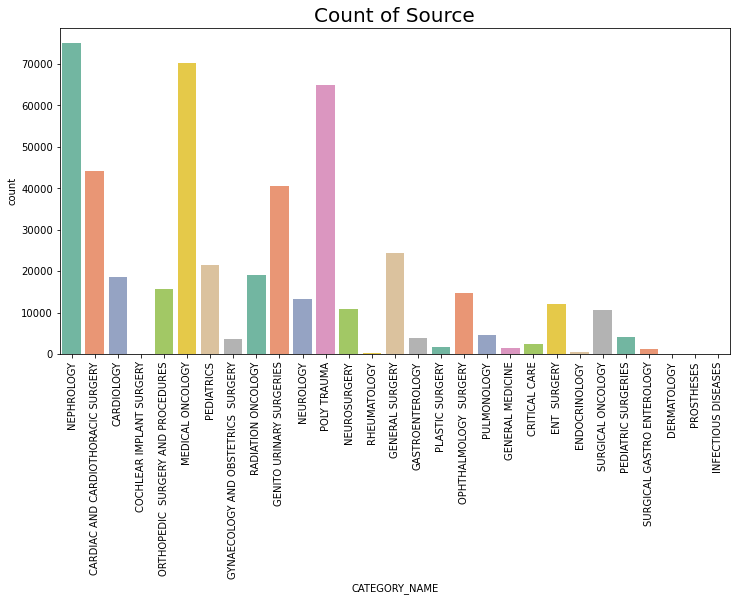

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(df['CATEGORY_NAME'], palette='Set2')
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)

### highest count of surgeries : Nephrology , Medical oncology , Polytrauma

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

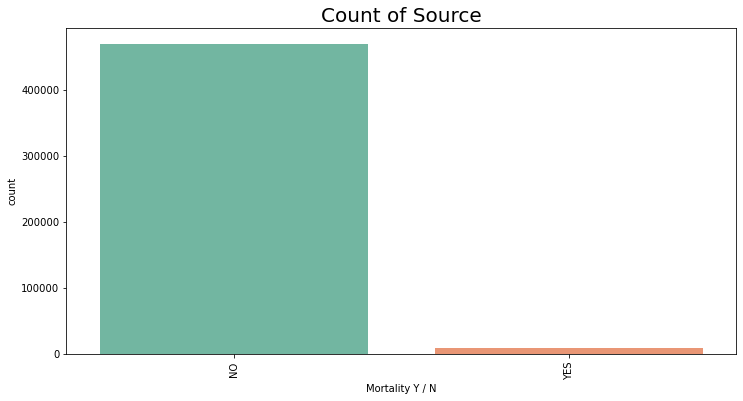

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(df['Mortality Y / N'], palette='Set2')
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)

C:\Users\Vasanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2013 00:00:00'),
  Text(1, 0, '2014 00:00:00'),
  Text(2, 0, '2017 00:00:00'),
  Text(3, 0, '2015 00:00:00'),
  Text(4, 0, '2016 00:00:00')])

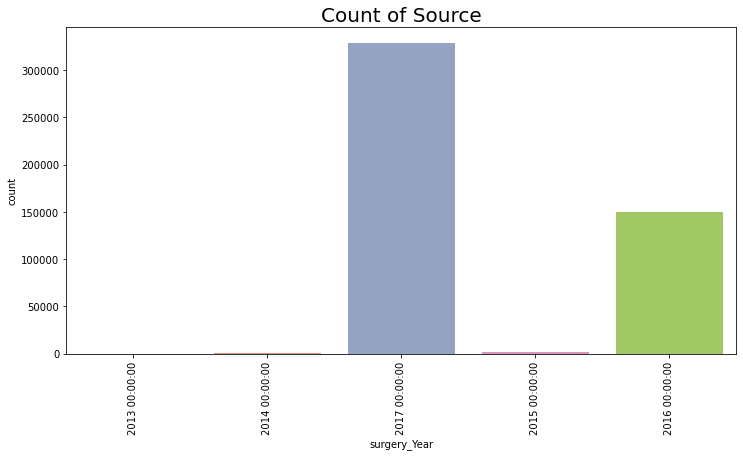

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(df['surgery_Year'], palette='Set2')
plt.title('Count of Source', size=20)
plt.xticks(rotation=90)

### Among all the surgery types :
### COCHLEAR IMPLANT SURGERY, 
### DERMRTOLOGY, 
### ENT SURGERY, 
### OPTHALALIMOLOGY SURGERY, 
### PROSTHESIS has high mortality rate

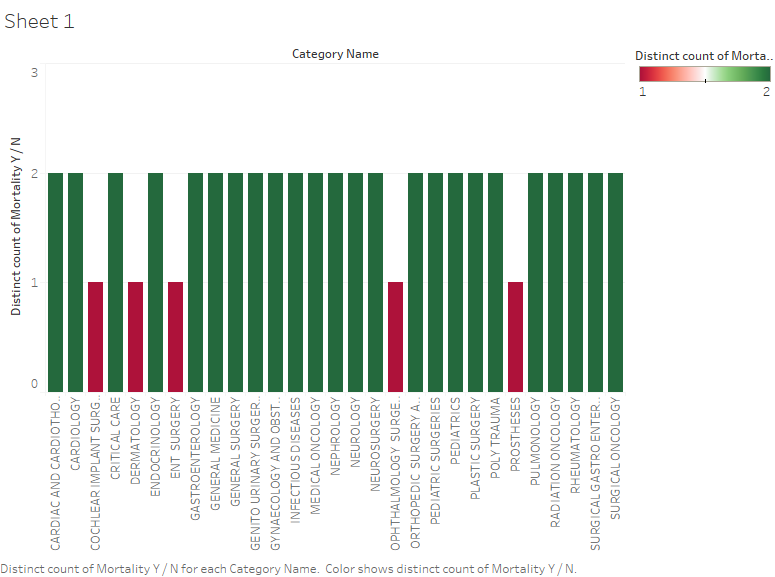

### Districts like Karimnagar, nizamabad, warangal has high level of mortality

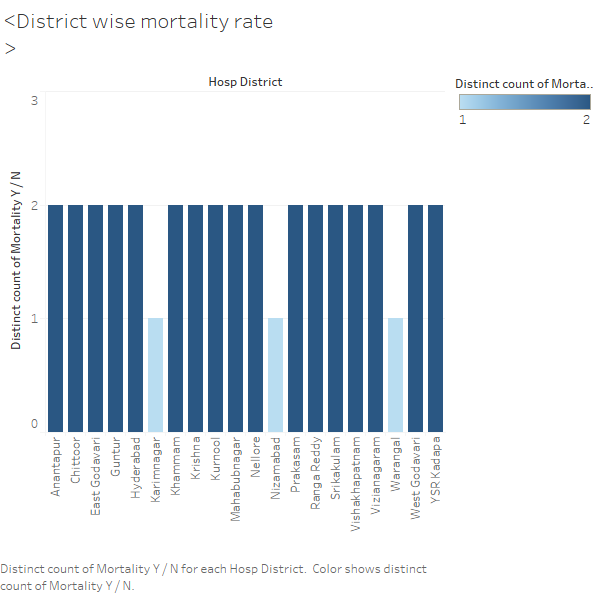

### List of hospitals in those districts

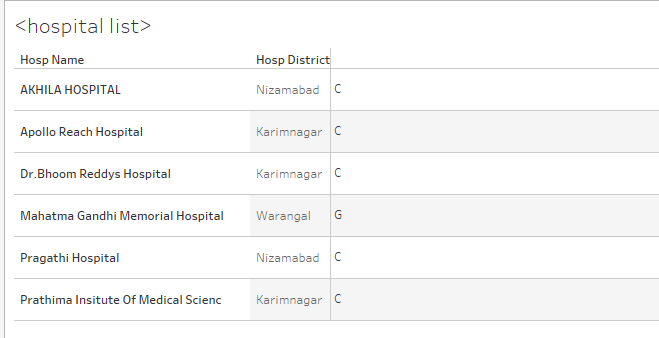


### Age details of the patients who were Passed away during the surgery

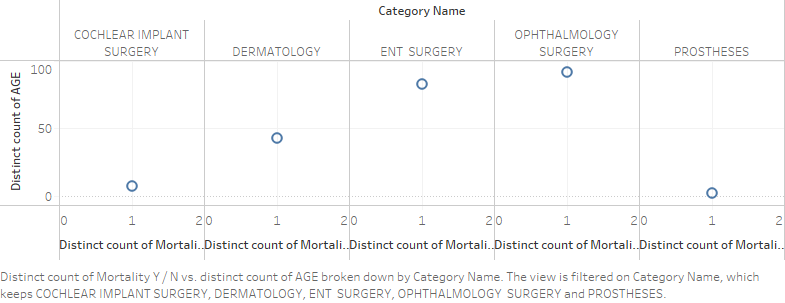

### Hence the rate of successfull surgeries are more. NTR arogyaseva has reached almost all the places over andhra pradesh and  became a saviour for Lakhs of  patients who needed help.